# TITANIC CHALLENGE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
# read_csv
data = pd.read_csv('train.csv')

data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Transform data

In [17]:
# ¿Que variables quiero usar?
# ¿Hay NaNs?
# ¿Cómo codifico las variables categóricas?  -> ONE-HOT ENCODING
# ¿Cómo normalizo mis datos? -> de momento no lo vamos a hacer
# ¿Cómo separo entre X y y? Cogiendo las columnas correspondientes y almacendandolas en variables

In [3]:
#Quitamos los NaNs del dataset
data = data.dropna()


In [4]:
# Eliminamos la variables que no son relevantes
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Parch', 'Cabin', 'SibSp', 'Embarked'], axis=1)

In [6]:
data

Survived  Pclass     Sex   Age
1           1       1  female  38.0
3           1       1  female  35.0
6           0       1    male  54.0
10          1       3  female   4.0
11          1       1  female  58.0
..        ...     ...     ...   ...
871         1       1  female  47.0
872         0       1    male  33.0
879         1       1  female  56.0
887         1       1  female  19.0
889         1       1    male  26.0

[183 rows x 4 columns]

In [7]:
# cambiar todos los parámetros para que sean todos numéricos
#from sklearn.preprocessing import MinMaxScaler

data = pd.get_dummies(data) # modifica los parámetros para que sean todos numéricos aplicando el ONE-HOT

In [8]:
data

Survived  Pclass   Age  Sex_female  Sex_male
1           1       1  38.0           1         0
3           1       1  35.0           1         0
6           0       1  54.0           0         1
10          1       3   4.0           1         0
11          1       1  58.0           1         0
..        ...     ...   ...         ...       ...
871         1       1  47.0           1         0
872         0       1  33.0           0         1
879         1       1  56.0           1         0
887         1       1  19.0           1         0
889         1       1  26.0           0         1

[183 rows x 5 columns]

In [9]:
#Seleccionar los datos Y y los datos X
y = data['Survived']  # --> features
x = data.drop(['Survived'], axis=1)   # --> etiquetas / labels

## Train/test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(x)
#x = scaler.transform(x)

In [12]:
print(x)

     Pclass   Age  Sex_female  Sex_male
1         1  38.0           1         0
3         1  35.0           1         0
6         1  54.0           0         1
10        3   4.0           1         0
11        1  58.0           1         0
..      ...   ...         ...       ...
871       1  47.0           1         0
872       1  33.0           0         1
879       1  56.0           1         0
887       1  19.0           1         0
889       1  26.0           0         1

[183 rows x 4 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Choose model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Train model

In [24]:
curve = {'i': [],
         'score': []}

for i in range(1, 12):
    clf = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    s = clf.score(x_test, y_test)
    print(f'N_neighbors = {i}: {s}')
    
    curve['i'].append(i)
    curve['score'].append(s)

N_neighbors = 1: 0.7837837837837838
N_neighbors = 2: 0.7297297297297297
N_neighbors = 3: 0.7297297297297297
N_neighbors = 4: 0.7027027027027027
N_neighbors = 5: 0.7567567567567568
N_neighbors = 6: 0.7297297297297297
N_neighbors = 7: 0.7027027027027027
N_neighbors = 8: 0.6756756756756757
N_neighbors = 9: 0.6756756756756757
N_neighbors = 10: 0.7027027027027027
N_neighbors = 11: 0.6756756756756757


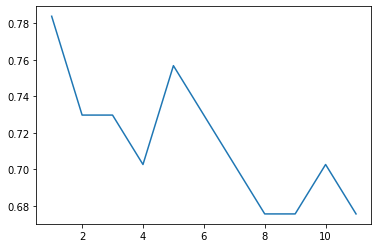

In [25]:
plt.plot(curve['i'], curve['score'])

In [26]:
## LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)

# clf = LogisticRegression()
# clf.fit(x, y)

# datos con los que se evalúan
print('Prediccion: ', clf.predict(x_test)) # El método predict me devuelve una CLASE
print('Real:       ', np.array(y_test))
print(clf.score(x_test, y_test))

Prediccion:  [1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1]
Real:        [0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1]
0.7567567567567568


/Users/pablot/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
y_pred = clf.predict_proba(x_test) # El método predit_proba, me devuelve probabilidades

In [18]:
y_pred

array([[0.41717122, 0.58282878],
       [0.17629497, 0.82370503],
       [0.04575189, 0.95424811],
       [0.58727328, 0.41272672],
       [0.574406  , 0.425594  ],
       [0.71252334, 0.28747666],
       [0.41717122, 0.58282878],
       [0.07521914, 0.92478086],
       [0.0716241 , 0.9283759 ],
       [0.61888999, 0.38111001],
       [0.63740538, 0.36259462],
       [0.0957919 , 0.9042081 ],
       [0.55491995, 0.44508005],
       [0.0716241 , 0.9283759 ],
       [0.60002242, 0.39997758],
       [0.41076019, 0.58923981],
       [0.04349897, 0.95650103],
       [0.52209432, 0.47790568],
       [0.76163057, 0.23836943],
       [0.04135219, 0.95864781],
       [0.07897927, 0.92102073],
       [0.07340136, 0.92659864],
       [0.53526356, 0.46473644],
       [0.4255803 , 0.5744197 ],
       [0.67898456, 0.32101544],
       [0.05495911, 0.94504089],
       [0.05877748, 0.94122252],
       [0.56793322, 0.43206678],
       [0.09649257, 0.90350743],
       [0.08914152, 0.91085848],
       [0.

## Evaluate model

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


In [39]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [40]:
y_pred = y_pred[:, 1]

In [42]:
y_pred

array([0.58282878, 0.82370503, 0.95424811, 0.41272672, 0.425594  ,
       0.28747666, 0.58282878, 0.92478086, 0.9283759 , 0.38111001,
       0.36259462, 0.9042081 , 0.44508005, 0.9283759 , 0.39997758,
       0.58923981, 0.95650103, 0.47790568, 0.23836943, 0.95864781,
       0.92102073, 0.92659864, 0.46473644, 0.5744197 , 0.32101544,
       0.94504089, 0.94122252, 0.43206678, 0.90350743, 0.91085848,
       0.95065945, 0.71997372, 0.50431815, 0.95065945, 0.49110571,
       0.90647277, 0.95968283])

In [43]:
y_pred > 0.5

array([ True,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [47]:
recall_score(y_test, y_pred>0.5)

0.8260869565217391

In [50]:
umbral = 0.9
precision_score(y_test, y_pred>umbral)

0.9411764705882353

In [51]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [56]:
rec = []
prec = []
f1s = []

for umbral in np.linspace(0.05, 0.95, 20):
    rec.append(recall_score(y_test, y_pred>umbral))
    prec.append(precision_score(y_test, y_pred>umbral))
    f1s.append(f1_score(y_test, y_pred>umbral))

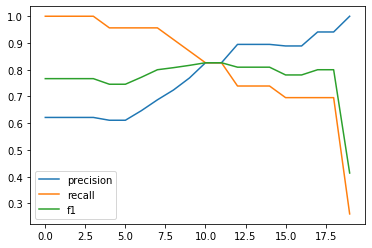

In [57]:
plt.plot(prec, label='precision')
plt.plot(rec, label='recall')
plt.plot(f1s, label='f1')
plt.legend()

In [63]:
idx_mejor_umbral = np.argmax(f1s)

In [64]:
mejor_umbral = np.linspace(0, 1, 20)[idx_mejor_umbral]
f1_score(y_test, y_pred>mejor_umbral)

0.8260869565217391

In [21]:
for i in range(1, 7):
    print(i)
    # crear un model
    clf = KNeighborsClassifier(n_neighbors=i)
    # K = i
    # entrenar modelo con k=i
    # evaluar
    # imprimir score

1
2
3
4
5
6


## Ejercicio: esocger otro modelo, entrenarlo y evaluar los resultados

Los outputs del modelo, ¿son continuos o discretos?

¿Que metrica has elegido?¿Por qué?

## Estimar resultados para el test set

## Guardar los resultados en un csv

## Subir los resultados a kaggle